In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, glob, time
import itertools, functools
from tqdm import tqdm

from collections import defaultdict, OrderedDict

In [2]:
ckpt_dirs = glob.glob('experiments/log_lambda_*')
ckpts = []
for cd in ckpt_dirs:
    ckpts_i = glob.glob(f'{cd}/checkpoints/*.pt')
    try:
        latest_file = max(ckpts_i, key=os.path.getctime)
    except ValueError:
        continue
    ckpts.append(latest_file)

# for ckpt in ckpts: 
#     !python3 compress.py -i data/kodak -o data/new_curves -ckpt $ckpt -silent -metrics 

In [3]:
log_dirs = glob.glob('data/curves/*.h5')# + glob.glob('data/new_curves/*.h5')

In [4]:
log_dirs

['data/curves/log_lambda_neg5_openimages_compression_2020_09_27_17_43_epoch3_idx100001_2020_09_28_11:40_compression_metrics.h5',
 'data/curves/log_lambda_2_openimages_compression_2020_09_27_17_59_epoch3_idx100001_2020_09_28_12:02_compression_metrics.h5',
 'data/curves/log_lambda_1_openimages_compression_2020_09_27_17_50_epoch3_idx100001_2020_09_28_20:28_compression_metrics.h5',
 'data/curves/log_lambda_neg4_openimages_compression_2020_09_27_17_44_epoch3_idx100001_2020_09_28_11:42_compression_metrics.h5',
 'data/curves/log_lambda_neg7_openimages_compression_2020_09_28_04_22_epoch3_idx89040_2020_09_28_20:22_compression_metrics.h5',
 'data/curves/log_lambda_neg6_openimages_compression_2020_09_27_17_43_epoch3_idx100001_2020_09_28_11:40_compression_metrics.h5',
 'data/curves/log_lambda_neg1_openimages_compression_2020_09_27_17_48_epoch3_idx100001_2020_09_28_20:26_compression_metrics.h5',
 'data/curves/log_lambda_neg7_openimages_compression_2020_09_28_04_22_epoch2_idx59360_2020_09_28_15:02_c

In [5]:
log_dirs

['data/curves/log_lambda_neg5_openimages_compression_2020_09_27_17_43_epoch3_idx100001_2020_09_28_11:40_compression_metrics.h5',
 'data/curves/log_lambda_2_openimages_compression_2020_09_27_17_59_epoch3_idx100001_2020_09_28_12:02_compression_metrics.h5',
 'data/curves/log_lambda_1_openimages_compression_2020_09_27_17_50_epoch3_idx100001_2020_09_28_20:28_compression_metrics.h5',
 'data/curves/log_lambda_neg4_openimages_compression_2020_09_27_17_44_epoch3_idx100001_2020_09_28_11:42_compression_metrics.h5',
 'data/curves/log_lambda_neg7_openimages_compression_2020_09_28_04_22_epoch3_idx89040_2020_09_28_20:22_compression_metrics.h5',
 'data/curves/log_lambda_neg6_openimages_compression_2020_09_27_17_43_epoch3_idx100001_2020_09_28_11:40_compression_metrics.h5',
 'data/curves/log_lambda_neg1_openimages_compression_2020_09_27_17_48_epoch3_idx100001_2020_09_28_20:26_compression_metrics.h5',
 'data/curves/log_lambda_neg7_openimages_compression_2020_09_28_04_22_epoch2_idx59360_2020_09_28_15:02_c

In [26]:
records = defaultdict(dict)
for log in log_dirs:
    fname = os.path.basename(log).split('_openimages')[0].strip()
    df = pd.read_hdf(log)
    sign = 1
    if 'neg' in fname:
        sign = -1
    fname = int(fname[-1]) * sign
    records[fname]['rate'] = df.q_bpp.mean()
    records[fname]['LPIPS'] = df.LPIPS.mean()
    records[fname]['PSNR'] = df.PSNR.mean()
    records[fname]['MS_SSIM'] = df.MS_SSIM.mean()

In [27]:
records = OrderedDict(sorted(records.items()))

In [34]:
records.pop(-7)
records.pop(3)
records.pop(2)

{'rate': 0.06086595356464386,
 'LPIPS': 0.1902853101491928,
 'PSNR': 25.41691017150879,
 'MS_SSIM': 0.8788809180259705}

In [35]:
rate = [records[i]['rate'] for i in range(min(records.keys()), max(records.keys()))]
lpips = [records[i]['LPIPS'] for i in range(min(records.keys()), max(records.keys()))]
psnr = [records[i]['PSNR'] for i in range(min(records.keys()), max(records.keys()))]
ms_ssim = [records[i]['MS_SSIM'] for i in range(min(records.keys()), max(records.keys()))]

In [36]:
sns.set_style("whitegrid")

In [37]:
rate

[1.1916099786758423,
 0.9417542815208435,
 0.7019307017326355,
 0.509679913520813,
 0.3491431474685669,
 0.24392008781433105,
 0.14090566337108612]

Text(0, 0.5, 'LPIPS')

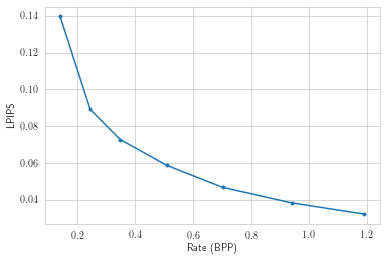

In [38]:
plt.plot(rate, lpips, 'o-', ms=3)
plt.xlabel('Rate (BPP)')
plt.ylabel('LPIPS')

Text(0, 0.5, 'PSNR')

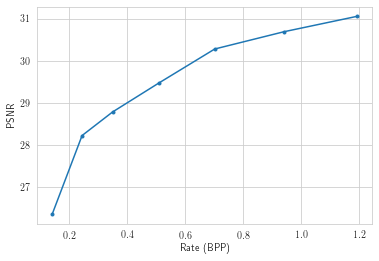

In [39]:
plt.plot(rate, psnr, 'o-', ms=3)
plt.xlabel('Rate (BPP)')
plt.ylabel('PSNR')

In [ ]:
def lambda_v_logpx(x, y, x_sig, y_sig, fname='lambda_v_logpx_bkg.pdf', lims=((-2,5),(0,4))):
    xlim, ylilm = lims
    xmin, xmax = xlim
    ymin, ymax = ylilm
    fs = 16
    # xmin, xmax, ymin, ymax = -5,5,-5.,5

    plt.figure(figsize=(10,6))
    plt.tick_params(axis='both', which='major', labelsize=15)
    # plt.tick_params(axis='both', which='minor', labelsize=15)
    plt.hexbin(x,y,gridsize=((60,60)), extent=(xmin,xmax, ymin,ymax), cmap='viridis')#, label='Background')
    # plt.hist2d(x,y,bins=((60,60)), range=((xmin,xmax),(ymin,ymax)),cmap='viridis')
    cb=plt.colorbar()
    cb.set_label(r'$N$', fontsize=fs)
    cb.ax.tick_params(labelsize=15)

    #create legend
    line1 = Line2D(range(1), range(1), color="white", marker='.', markersize=16, markerfacecolor="red", linestyle='none')
    line4 = Line2D(range(1), range(1), color="white", marker='H',markersize=12,markerfacecolor="tab:green", linestyle='none')
    plt.legend((line1,line4),('Signal', 'Background'), numpoints=1, loc=2, fontsize=14)

    color = 'red'
    plt.xlim((xmin,xmax))
    plt.ylim((ymin,ymax))
    plt.scatter(x_sig,y_sig, marker='.', c=color, label='Signal', alpha=0.8)
    # plt.legend(fontsize=18)

    plt.xlabel(r'$\log p(\mathbf{x} \vert \textsf{bkg})$', fontsize=20)
    # plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
    plt.ylabel(r'$\lambda(\mathbf{x})^{-1}$', fontsize=20)
    plt.savefig(os.path.join('imgs',fname), bbox_inches='tight', format='pdf', dpi=128)

Points on the RD curve indicate $\lambda$ values on an exponential grid from $[2^{-7}, 2^3]$.

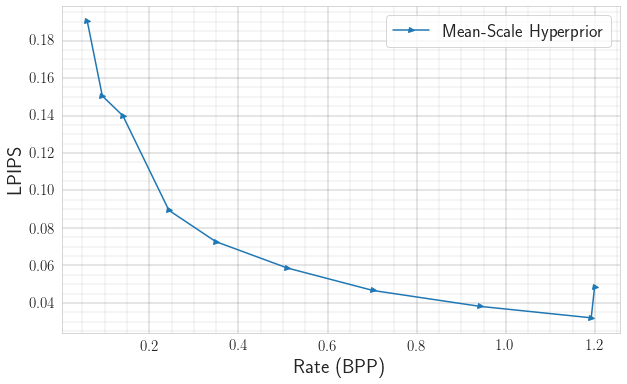

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(rate, lpips, marker='>', ms=5, label='Mean-Scale Hyperprior')
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='grey', linewidth=0.4)
ax.grid(b=True, which='minor', color='grey', linewidth=0.15)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Rate (BPP)', fontsize=20)
# plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
plt.ylabel(r'LPIPS', fontsize=20)
plt.legend(fontsize=18)

,input_filename,output_filename,bpp_original,q_bpp,LPIPS,PSNR,MS_SSIM
0,kodak_im15,data/curves/kodak_im15_RECON_0.806bpp.png,12.463013,0.805802,0.033382,31.896833,0.981218
1,kodak_im12,data/curves/kodak_im12_RECON_0.844bpp.png,10.803711,0.843865,0.032473,33.686520,0.982517
2,kodak_im18,data/curves/kodak_im18_RECON_1.061bpp.png,15.888408,1.060870,0.045519,28.477293,0.977917
3,kodak_im08,data/curves/kodak_im08_RECON_1.178bpp.png,16.041464,1.177995,0.046584,26.155327,0.981028
4,kodak_im21,data/curves/kodak_im21_RECON_0.878bpp.png,12.960835,0.878326,0.039994,29.680775,0.983347
5,kodak_im14,data/curves/kodak_im14_RECON_1.090bpp.png,14.082866,1.090473,0.053228,29.386656,0.980525
6,kodak_im11,data/curves/kodak_im11_RECON_0.977bpp.png,12.634746,0.977109,0.039119,30.238386,0.980469
7,kodak_im23,data/curves/kodak_im23_RECON_0.728bpp.png,11.344319,0.728376,0.015856,34.532951,0.987773
8,kodak_im20,data/curves/kodak_im20_RECON_0.659bpp.png,10.019165,0.659061,0.024829,32.181431,0.985066
9,kodak_im01,data/curves/kodak_im01_RECON_1.155bpp.png,14.984151,1.155156,0.049943,28.050940,0.977393
